In [1]:
#Classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
os.getcwd()

'C:\\Users\\Admin\\Desktop\\Durga(Python)\\AWP File'

In [3]:
#To load dataset
df = pd.read_csv("insurance (3).csv")

In [4]:
#To show first 5 record
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [5]:
#To check the null value in dataset
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

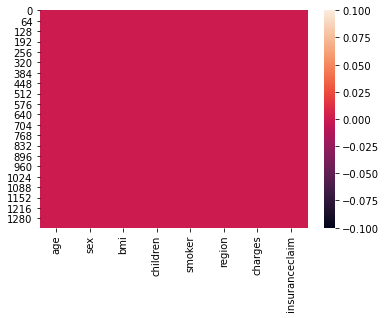

In [6]:
#Visualise null value
sb.heatmap(df.isnull())
plt.show()

In [7]:
#All information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [8]:
#To check duplicate Rows ?
df.duplicated().sum()

1

In [9]:
#To show duplicates row's record
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
581,19,1,30.59,0,0,1,1639.5631,1


In [10]:
#To delete duplicate record
df.drop_duplicates(inplace=True)

In [11]:
#To check duplicate Rows ?
df.duplicated().sum()

0

In [12]:
#How many rows nad columns
df.shape

(1337, 8)

In [13]:
#we have classification dataset means this dataset solved for 
#classification algorithm, here use
#1.Logistic Regression
#To predict , customer claim for insurance or not

In [14]:
#How many category in output variable insuranceclaim 
df["insuranceclaim"].unique()

array([1, 0], dtype=int64)

In [15]:
#How many category of 1 and 0
df["insuranceclaim"].value_counts()

1    782
0    555
Name: insuranceclaim, dtype: int64

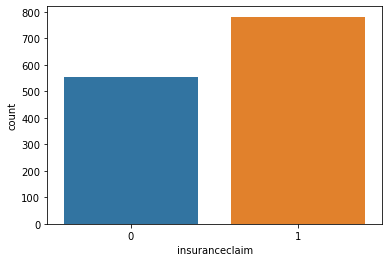

In [16]:
#Visualise 
sb.countplot(data=df,x='insuranceclaim')
f = df["insuranceclaim"].value_counts() 
plt.show()

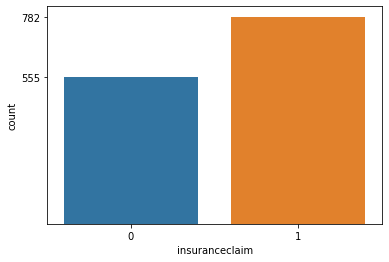

In [17]:
#Visualise 
sb.countplot(data=df,x='insuranceclaim')
f = df["insuranceclaim"].value_counts()
#for the exact value
plt.yticks(f)   
plt.show()

In [18]:
#Select input and output
x = df.drop("insuranceclaim",axis=1)  #input select
y = df["insuranceclaim"]    #output select

In [19]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,
                                                random_state=1)

In [20]:
x_train.shape , x_test.shape

((935, 7), (402, 7))

In [21]:
x_train.head()

,age,sex,bmi,children,smoker,region,charges
520,50,0,27.360,0,0,0,25656.57526
575,58,0,27.170,0,0,1,12222.89830
770,61,1,36.100,3,0,3,27941.28758
314,27,0,31.400,0,1,3,34838.87300
426,38,0,27.265,1,0,0,6555.07035


In [22]:
#Apply scaling on x_train and x_test
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)  #convert into numpy array
x_test = ss.transform(x_test)   #convert into numpy array

In [23]:
x_train

array([[ 0.76935907, -1.05611771, -0.54584829, ..., -0.53158148,
        -1.38997482,  0.97973397],
       [ 1.34169182, -1.05611771, -0.57768002, ..., -0.53158148,
        -0.48304777, -0.11634023],
       [ 1.5563166 ,  0.94686415,  0.91841121, ..., -0.53158148,
         1.33080632,  1.16614713],
       ...,
       [-1.23380557,  0.94686415,  0.5280537 , ..., -0.53158148,
         0.42387927, -0.97698935],
       [ 0.05394313, -1.05611771, -1.40698031, ...,  1.88117914,
         0.42387927,  0.47286216],
       [ 1.41323342,  0.94686415,  1.76278969, ...,  1.88117914,
         0.42387927,  2.88193206]])

# 1. LogisticRegression

In [24]:
#give data to Logistic Regression Alogrithm , call inbuilt class
#LogisticRegression
from sklearn.linear_model import LogisticRegression

In [25]:
#create object for LogisticRegression class
lr = LogisticRegression()

In [26]:
#train the model with 70% data
lr.fit(x_train,y_train)

LogisticRegression()

In [27]:
#Test the model with 30% data
y_pred = lr.predict(x_test)   
#y_pred = 1/(1+np.exp(-x_test)) : give value of probability
#np.where(y_pred >= 0.5, 1, 0)

In [28]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [29]:
dict = {"Actual":y_test , "Predicted":y_pred}
df1 = pd.DataFrame(dict)
df1

,Actual,Predicted
629,1,1
1087,1,1
283,1,1
790,1,1
594,1,1
...,...,...
924,0,0
873,1,0
731,0,0
363,0,0


In [30]:
#Find accuracy score, inbuilt method score() which define in
#Logistic Regression class
lr.score(x_test,y_test)   #score between 0 to 1

0.8855721393034826

In [31]:
#check recall_score
from sklearn.metrics import classification_report
#classification_report inbuilt class which define in sklearn.metrics
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       172
           1       0.89      0.91      0.90       230

    accuracy                           0.89       402
   macro avg       0.88      0.88      0.88       402
weighted avg       0.89      0.89      0.89       402



# Day 23

In [32]:
#check confusion matrix. inbuilt class confusion_matrix()
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,y_pred))
#                 Actual
#                 1    0
# Predicted  1  [[TP  FP]
#            0   [FN  TN]]

[[147  25]
 [ 21 209]]


In [33]:
#Here Score is very good(Recall )but we can more better of this score
#means feature selection means select imp input to predict the output :

#Analysis for Feature Selection : Manually
#use vsualisation for feature selection

In [34]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [35]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [36]:
#in this dataset , we have input :
#some are categorical / discrete type input : sex,children,smoker,region
#some contineous numerical type input : age,bmi,charges

#here output variable also categorical type : insuranceclaim

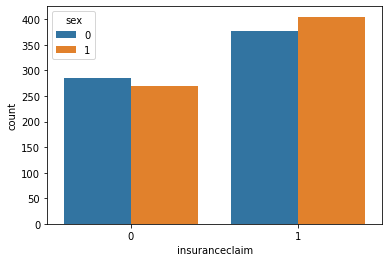

In [37]:
#if work on categorical type input , use visualisation : countplot()
#first take input sex with output insuranceclaim and check sex input
#is important to predict the output or not ?

sb.countplot(data=df,x="insuranceclaim",hue='sex')
#x = output variable and hue = input variable 
plt.show()

In [38]:
#sex input is not important to predict the output insuranceclaim

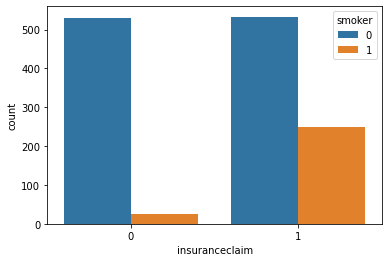

In [39]:
#now take input smoker with output insuranceclaim and check smoker input
#is important to predict the output or not ?

sb.countplot(data=df,x="insuranceclaim",hue='smoker')
#x = output variable and hue = input variable 
plt.show()

In [40]:
#clear, smoker input column is imp to predict the output insuranceclaim

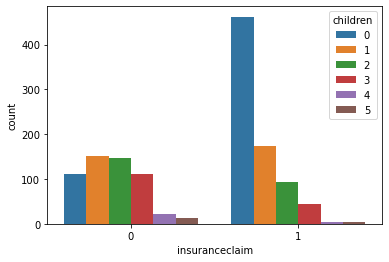

In [41]:
#now take input children with o/p insuranceclaim and check children input
#is important to predict the output or not ?

sb.countplot(data=df,x="insuranceclaim",hue='children')
#x = output variable and hue = input variable 
plt.show()

In [42]:
#clear, children input column is imp to predict the output insuranceclaim

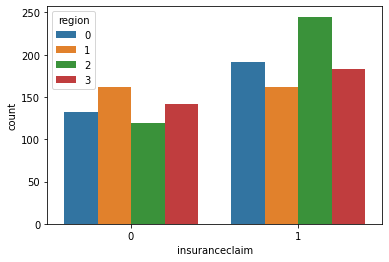

In [43]:
#now take input region with o/p insuranceclaim and check region input
#is important to predict the output or not ?

sb.countplot(data=df,x="insuranceclaim",hue='region')
#x = output variable and hue = input variable 
plt.show()

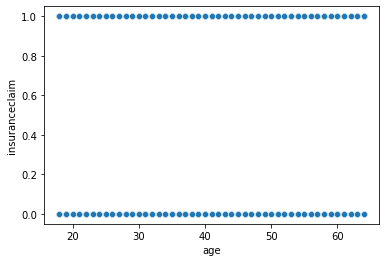

In [44]:
#take continuous numerical column : first take input Age with
#output insuranceclaim : use scatterplot

sb.scatterplot(data=df, x="age", y="insuranceclaim")
#here take input in x and output in y
plt.show()

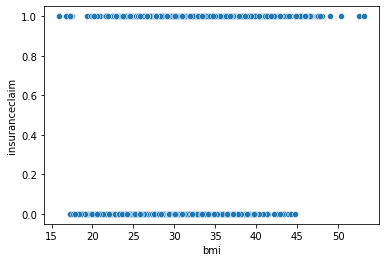

In [45]:
#take continuous numerical column : first take input bmi with
#output insuranceclaim : use scatterplot

sb.scatterplot(data=df, x="bmi", y="insuranceclaim")
#here take input in x and output in y
plt.show()

In [46]:
#input age is not important to predict the output insuranceclaim

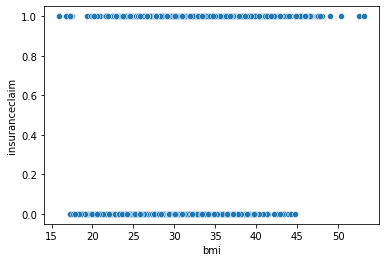

In [47]:
#take continuous numerical column : first take input bmi with
#output insuranceclaim : use scatterplot

sb.scatterplot(data=df, x="bmi", y="insuranceclaim")
#here take input in x and output in y
plt.show()

In [48]:
#bmi input is important to predict the output insuranceclaim

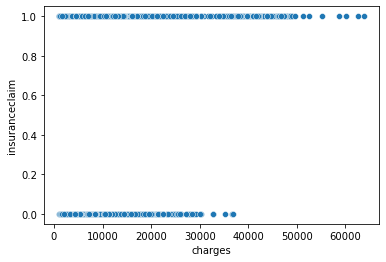

In [49]:
#take continuous numerical column : first take input charges with
#output insuranceclaim : use scatterplot

sb.scatterplot(data=df, x="charges", y="insuranceclaim")
#here take input in x and output in y
plt.show()

In [50]:
#here the charges are not important to predict the output insuranceclaim
#instead of charges we can take bmi for input 

In [51]:
#here imp features: smoker,children,bmi,(region,charge: doubtful)
#manually with the help of visualisation 

# 2.DecisonTreeClassifier (Day 24)

In [52]:
#It is also classfication algorithm, It is used to predict the value of 
#yes/no or used for multiclass classifier
#(setosa 0/virginica 1/versicolor 2)
#Advantages of DTC : to select imp features(input) to predict the output
#automatic with the help of Entropy or Gini index method
#if used Entropy method :- here find the information to gain of each input

In [53]:
#give dataset in DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [54]:
#create the object of class DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=1)

In [55]:
#train the model with 70% data
dtc.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [56]:
x.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [57]:
#Show the information gain of each input (each features)
#inbuilt method : feature_importances_  of DecisionTreeClassifier class
dict = {"Input":x.columns , "IG":dtc.feature_importances_}

#convert dict into Dataframe 
df1 = pd.DataFrame(dict)
df1

,Input,IG
0,age,0.082568
1,sex,0.000000
2,bmi,0.330158
3,children,0.377550
4,smoker,0.180860
5,region,0.000000
6,charges,0.028864


In [60]:
df1.sort_values('IG',ascending=False,ignore_index=True)

,Input,IG
0,children,0.377550
1,bmi,0.330158
2,smoker,0.180860
3,age,0.082568
4,charges,0.028864
5,sex,0.000000
6,region,0.000000


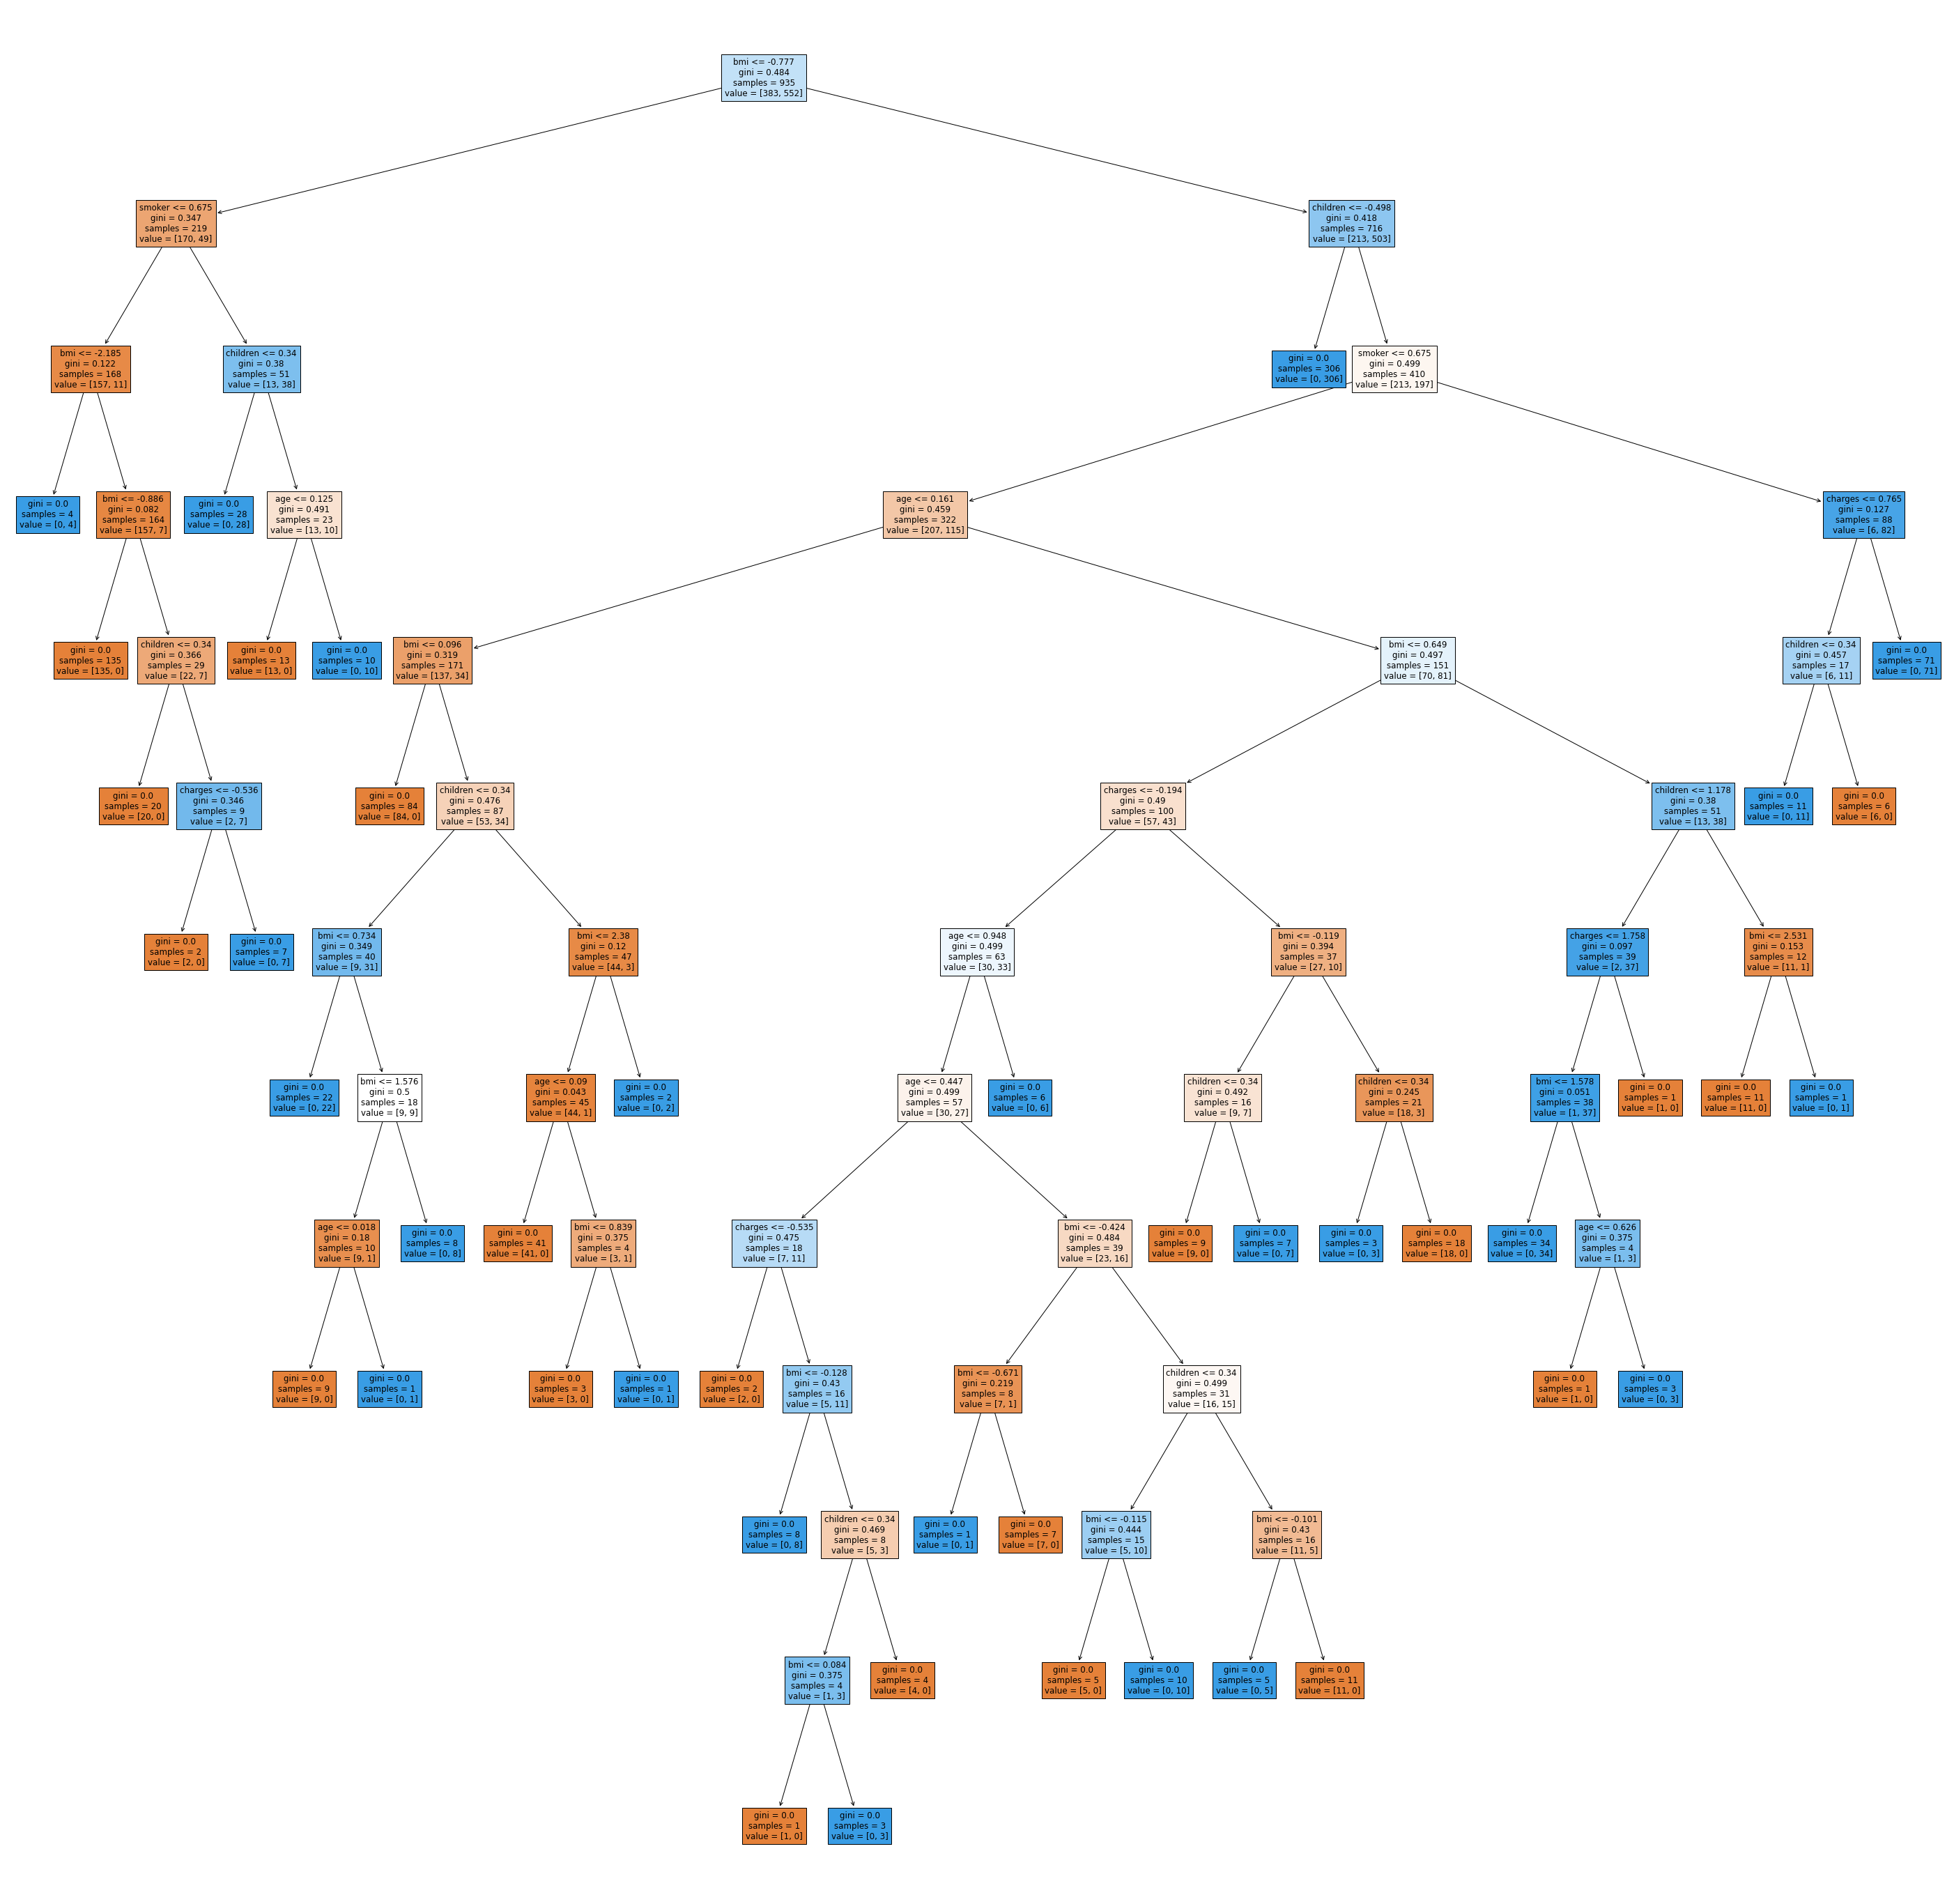

In [66]:
#create a tree
from sklearn import tree
features = x.columns

plt.figure(figsize=(50,50))
_=tree.plot_tree(dtc,feature_names=features,filled=True)
plt.show()

In [67]:
#Test the model with 30% data , use inbuilt method of
#DecisionTreeClassifier class
y_pred = dtc.predict(x_test)

In [69]:
dict = {"Actual":y_test , "Predict":y_pred}
df_pred = pd.DataFrame(dict)
df_pred.head()

,Actual,Predict
629,1,1
1087,1,1
283,1,1
790,1,1
594,1,1


In [72]:
#print the classification report matrix
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       172
           1       0.98      0.96      0.97       230

    accuracy                           0.97       402
   macro avg       0.97      0.97      0.97       402
weighted avg       0.97      0.97      0.97       402



In [73]:
#print the confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[168   4]
 [  9 221]]
